In [3]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [6]:
df = pd.read_csv("BostonHousing.csv")
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [7]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [8]:
df.shape

(506, 14)


1.   CRIM - уровень преступности на душу населения по городам
2.  ZN - доля жилых земель, зонированных на участки площадью более 25 000 кв. футов.
3. INDUS - доля акров неторговых площадей в городе.
4. CHAS - фиктивная переменная Charles River (1, если участок огибает реку; 0 в противном случае).
5. NOX - концентрация оксидов азота (частей на 10 миллионов).
6. RM - среднее количество комнат на одно жилище
7. AGE - доля домов, занятых владельцами, построенных до 1940 года.
8. DIS - взвешенные расстояния до пяти бостонских центров занятости
9. RAD - индекс доступности радиальных магистралей
10. TAX - ставка налога на полную стоимость недвижимости на $10 000
11. PTRATIO - соотношение числа учеников и учителей по городам
12. B - 1000(Bk - 0.63)^2, где Bk - доля чернокожих в городе
13. LSTAT - % населения с более низким статусом
14. MEDV - медианная стоимость домов, занимаемых владельцами, в 1000 долларов




plt.figure(figsize = [15,8])
corr = df.corr()
ax = sns.heatmap(corr, annot = True)

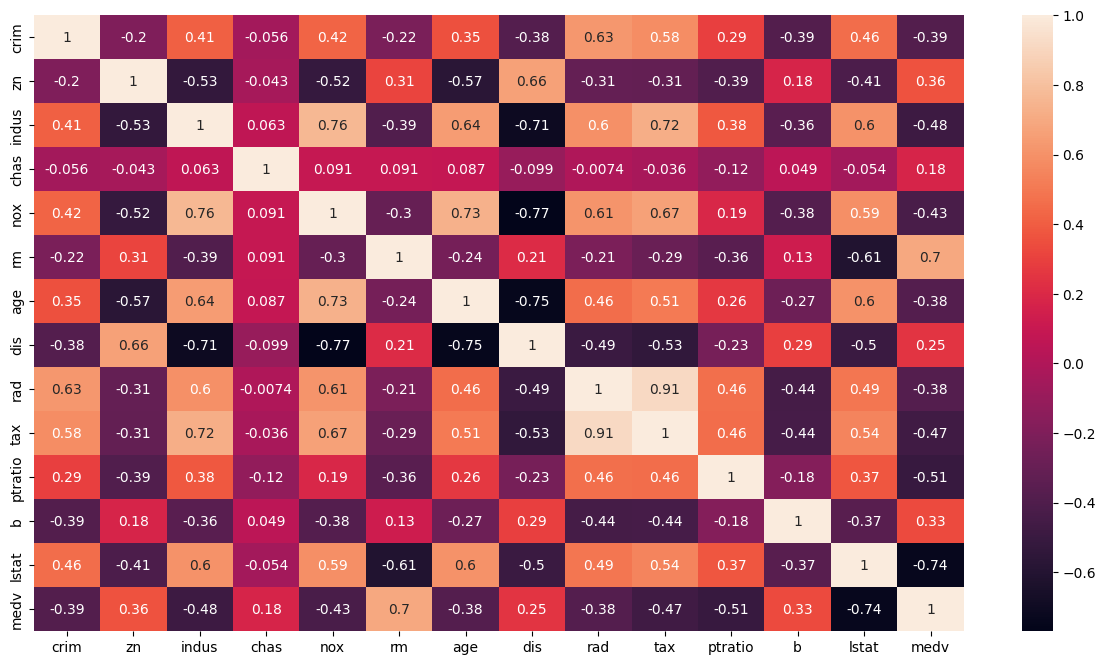

In [9]:
plt.figure(figsize = [15,8])
corr = df.corr()
ax = sns.heatmap(corr, annot = True)

Из полученной корреляции можно сделать следующие выводы:
1. Целевым показателем является цена
2. Чем больше преступность, тем меньше цена
3. Можно сказать, что чем больше огромных участков, тем больше цена, что лоигчно т.к. болшие участки больше стоют
4. Чем меньше магазинов, коммерч предприятия и т.д в районе, тем меньше цена
5. река практические не оказывает влияние на цену дома
6. Чем больше концентрация оксида озота в районе, тем меньше цена ( так как люди не ходят жить в загрязненной атмосфере)
7. Возраст домовй негативно сказывается на цене дома
8. расстояние центров занятости не играет особой роли
9. Чем ближе центральная магистраль, тем ниже цена
10. Ставка налога играет отрицательную роль в цене
11. Как ни странной1 соотношение учеников и учителей играет роль
12. кол-во темнокожих не играет роль
13. Чем больше людей низкого статуса, тем меньше цена


Из всех данных видно, что на цену Сильно влияют кол-во людей с низким статусом, среднее кол-во комнат, количество учеников и учителей, количество коммерч сооружений

22.532806324110677

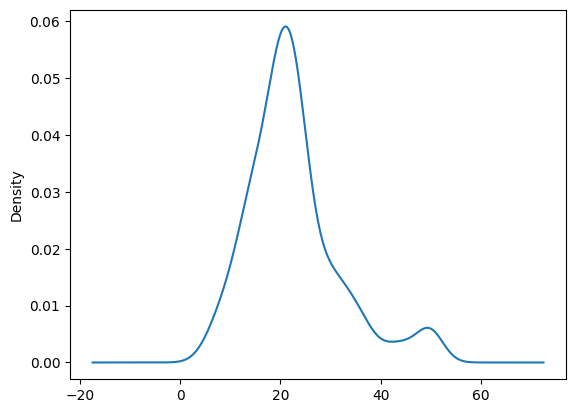

In [10]:
#Начнем с описания и анализа цены в целом
df.medv.plot.density()
df["medv"].mean()

Видим что в основном цена варьируется от 18 до 24, а медианная равна 24

<Axes: xlabel='lstat', ylabel='medv'>

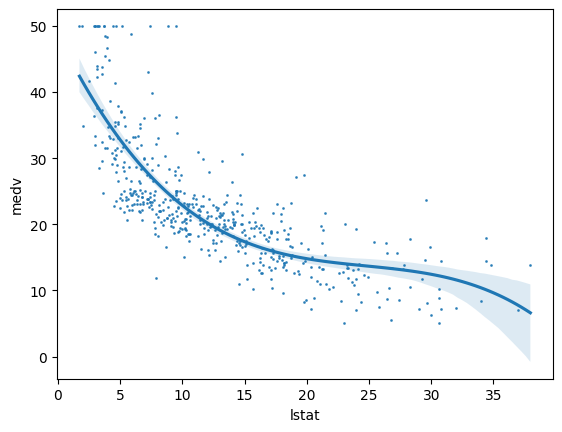

In [11]:
#узнаем как сильно влияет процент населения с низким стаутос

sns.regplot(x='lstat', y='medv', data=df, scatter_kws={'s':1},  order = 3)


По графику видно, что цена очень сильно падает вначале увеличения людей низкого статуса, разница между 3 и 10 процентами высока, однако затем цена падает постепенно и далее увеличение людей с низким статусом не так сильно влияет на падение цены.

In [12]:
#теперь узнаем инфу о комнатах, вначале сколько и каких комнат
rooms = df.rm.copy()
df_copy = df.copy()
round_rooms = rooms.apply(round).tolist()
df_copy["rooms"] = round_rooms
medv_room = df_copy.groupby('rooms')["medv"].agg(['mean', 'median', 'min', 'max'])
medv_room

,mean,median,min,max
rooms,,,,
4,17.020000,13.80,8.8,27.5
5,14.945946,14.40,5.0,50.0
6,19.366026,19.90,5.0,50.0
7,28.047200,28.70,7.5,50.0
8,45.562500,46.35,35.2,50.0
9,40.633333,50.00,21.9,50.0


<Axes: xlabel='rooms', ylabel='medv'>

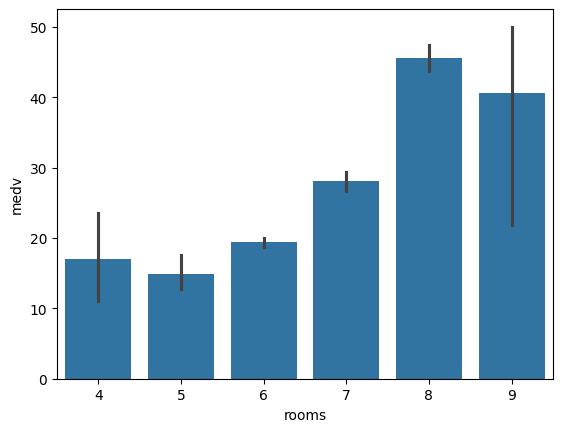

In [13]:
df_copy["medv"] = df["medv"]
sns.barplot(data = df_copy, x = 'rooms', y = 'medv')

Видим что чем больше комнат, тем выше цена, однако есть побочный эффект в 4 и 9 данных из-за малого колво данных

<Axes: xlabel='ptratio', ylabel='medv'>

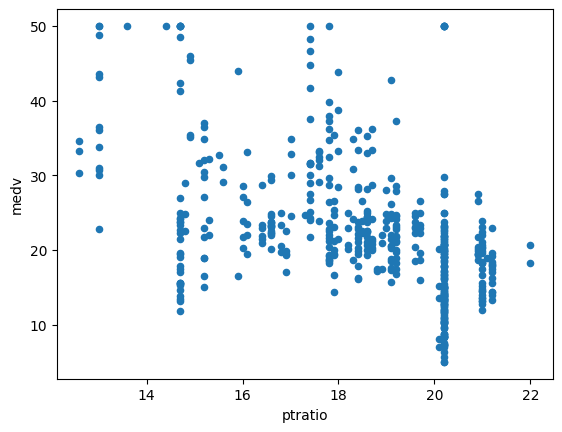

In [14]:
#посмотрим как соотношение чеников и учителей влияет на цену
df.plot.scatter("ptratio","medv")

<Axes: xlabel='ptratio', ylabel='medv'>

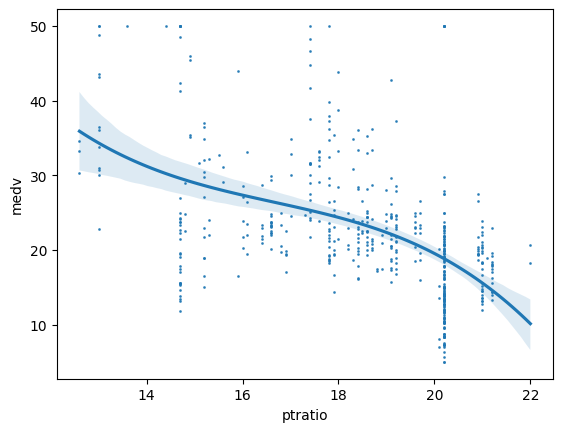

In [15]:
sns.regplot(x='ptratio', y='medv', data=df, scatter_kws={'s':1},  order = 3)

Видим что несмотря на то, что имеет тенденция на спад цены, когда на одного студента приходится мньшее кол во учителей, однако график имеет очень большие отклонения и брать этот фактор опеределющим не имеет смысла

Видим, что в помещении от 4 до 9 комнат

<Axes: xlabel='indus', ylabel='medv'>

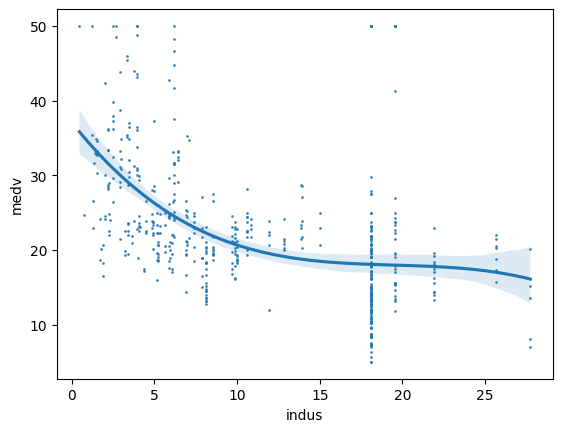

In [16]:
sns.regplot(x='indus', y='medv', data=df, scatter_kws={'s':1},  order = 3)

Видим что чем меньше торговых площадей тем меньше цена так ка меньше привлекательность района, однако чем больше торг тем меньше замечается эта тенденция в дальнейшем